## **Machine Learning Intro | Assignment **

 Question 1: Explain the differences between AI, ML, Deep Learning (DL), and Data Science (DS).

 **Answer:**  

 - Artificial Intelligence (AI):

   -  AI is a broad field that focuses on building systems capable of performing tasks that normally require human intelligence.

   - Examples: Chatbots, recommendation systems, self-driving cars.

- Machine Learning (ML):

   - ML is a subset of AI where machines learn patterns from data and improve automatically without being explicitly programmed.

  - Example: Spam email filtering.

- Deep Learning (DL):

   - DL is a subset of ML that uses artificial neural networks with multiple layers to learn complex patterns. It is especially useful for image, speech, and natural language tasks.

   - Example: Facial recognition in smartphones.

 - Data Science (DS):

   - DS is a multidisciplinary field that uses data, statistics, ML, and domain knowledge to extract insights and help in decision-making.

   - Example: Analyzing customer purchase history to predict future buying trends.

Question 2: What are the types of machine learning? Describe each with one real-world example.

**Answer :** There are 3 main types of Machine Learning:

1.  Supervised Learning

- The model is trained on labeled data (input + correct output).

- It learns the mapping between input and output.

- Example: Predicting house prices based on features like size, location, and number of rooms.

2. Unsupervised Learning

- The model works on unlabeled data (only input, no correct output).

- It groups or finds hidden patterns in data.

- Example: Customer segmentation in marketing (grouping customers by buying behavior).

3. Reinforcement Learning (RL)

- The model learns by interacting with an environment and receiving rewards/penalties based on its actions.

- Goal: maximize long-term reward.

- Example: Training robots to walk or teaching AI to play games like Chess or Atari.  

Question 3: What is Learning in Machine Learning?

**Answer:**

- Learning in ML refers to the process by which an algorithm improves its performance on a task as it gains more experience (data).

- It means finding patterns/relationships in data and using them to make predictions or decisions without being explicitly programmed.

Types of Learning:

   - Supervised Learning → learns from labeled data.

   - Unsupervised Learning → learns from unlabeled data.

   - Reinforcement Learning → learns from rewards and penalties.

Question 4: What are outliers in a dataset, and list three common techniques for handling them.

**Answer:**

- Outliers: Data points that significantly differ from other observations in a dataset. They may occur due to variability in data, measurement errors, or noise.

- Why Important? Outliers can distort statistical analysis and reduce model accuracy.

Common Techniques to Handle Outliers:

- Removal: Delete the outlier values if they are due to errors.

- Transformation: Apply log, square root, or normalization to reduce the effect of outliers.

- Capping/Clipping (Winsorization): Replace extreme values with a specified percentile (e.g., 5th and 95th percentile)

Question 5: Explain the process of handling missing values and mention one imputation technique for numerical and one for categorical data.

**Answer:**

- Handling Missing Values Process:

   * Identify missing values in the dataset.

  - Analyze the pattern (random or systematic).

   - Choose a strategy: remove rows/columns with missing values or fill them using imputation.

Imputation Techniques:

  - Numerical Data: Replace missing values with mean/median (e.g., filling missing ages with the median age).

 - Categorical Data: Replace missing values with the mode (most frequent category).

 Question 6: Imbalanced dataset creation & class distribution

**Answer:**

In [1]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd

# Create synthetic imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.9, 0.1],
                           random_state=42)

# Print class distribution
unique, counts = np.unique(y, return_counts=True)
class_dist = dict(zip(unique, counts))
print("Class Distribution:", class_dist)


Class Distribution: {np.int64(0): np.int64(895), np.int64(1): np.int64(105)}


Question 7: One-hot encoding with pandas

In [2]:
import pandas as pd

# List of colors
colors = ['Red', 'Green', 'Blue', 'Green', 'Red']

# Convert into dataframe
df = pd.DataFrame(colors, columns=['Color'])

# Apply one-hot encoding
one_hot = pd.get_dummies(df['Color'])

# Combine with original DataFrame
result = pd.concat([df, one_hot], axis=1)
print(result)


   Color   Blue  Green    Red
0    Red  False  False   True
1  Green  False   True  False
2   Blue   True  False  False
3  Green  False   True  False
4    Red  False  False   True


Question 8: Normal distribution + missing values + imputation + histogram

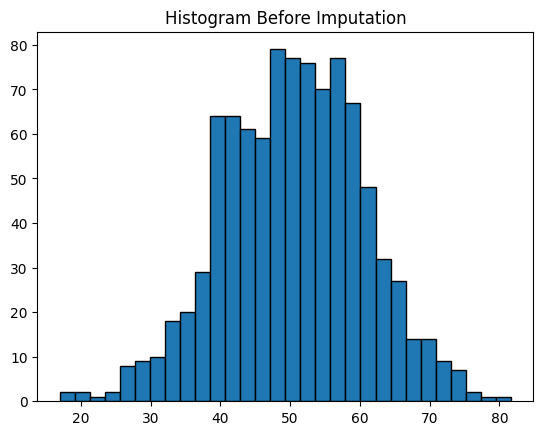

/tmp/ipython-input-442753659.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Value'].fillna(mean_value, inplace=True)


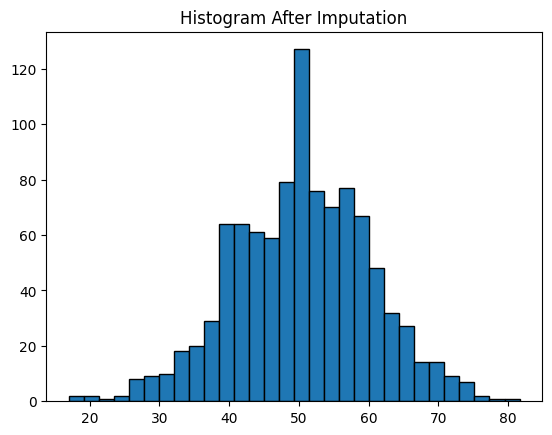

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Generate 1000 samples from normal distribution
data = np.random.normal(loc=50, scale=10, size=1000)

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Value'])

# Step 2: Introduce 50 random missing values
missing_indices = np.random.choice(df.index, size=50, replace=False)
df.loc[missing_indices, 'Value'] = np.nan

# Step 3: Plot histogram before imputation
plt.hist(df['Value'], bins=30, edgecolor='black')
plt.title("Histogram Before Imputation")
plt.show()

# Step 4: Fill missing values with column mean
mean_value = df['Value'].mean()
df['Value'].fillna(mean_value, inplace=True)

# Step 5: Plot histogram after imputation
plt.hist(df['Value'], bins=30, edgecolor='black')
plt.title("Histogram After Imputation")
plt.show()


Question 9: Implement Min-Max scaling on the following list of numbers [2, 5, 10, 15,
20] using sklearn.preprocessing.MinMaxScaler. Print the scaled array.

In [4]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Original data
data = np.array([[2], [5], [10], [15], [20]])

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform
scaled_data = scaler.fit_transform(data)

print("Original Data:\n", data.flatten())
print("Scaled Data:\n", scaled_data.flatten())


Original Data:
 [ 2  5 10 15 20]
Scaled Data:
 [0.         0.16666667 0.44444444 0.72222222 1.        ]


Question 10: Data Preparation Plan for Retail Dataset

**Answer:** Here’s the step-by-step plan before training the ML model:

1.  Handle Missing Ages:

- Use median imputation for numerical values like age.

2.  Handle Outliers in Transaction Amount:

- Detect using IQR method or z-scores.

- Treat by capping values to upper/lower bounds.

3. Handle Imbalance in Target (Fraud vs. Non-Fraud):

 -  Use resampling techniques:

    - Oversample minority class (e.g., SMOTE)

     - Undersample majority class

- Or use class weights in the model.

4. Handle Categorical Variables (Payment Method):

- Apply One-Hot Encoding (if few categories).

- Or Target/Ordinal Encoding (if many categories).

5. Scaling:

Apply MinMaxScaler or StandardScaler on numerical features.

In [8]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler

# ---------------------------
# 1. Sample Dataset
# ---------------------------
data = {
    'Age': [25, np.nan, 40, 35, np.nan, 50],
    'TransactionAmount': [50, 2000, 60, 55, 5000, 45],
    'PaymentMethod': ['Card', 'Cash', 'UPI', 'Card', 'UPI', 'Cash'],
    'Fraud': [0, 0, 0, 0, 1, 0]
}

df = pd.DataFrame(data)
print("Original Data:\n", df, "\n")

# ---------------------------
# 2. Handle Missing Values (Median for Age)
# ---------------------------
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])

# ---------------------------
# 3. Handle Outliers (IQR Method for TransactionAmount)
# ---------------------------
Q1, Q3 = df['TransactionAmount'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['TransactionAmount'] = np.where(df['TransactionAmount'] > upper_bound, upper_bound,
                                   np.where(df['TransactionAmount'] < lower_bound, lower_bound, df['TransactionAmount']))

# ---------------------------
# 4. Encode Categorical Variables (One-Hot Encoding)
# ---------------------------
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(df[['PaymentMethod']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['PaymentMethod']))

df = pd.concat([df.drop('PaymentMethod', axis=1), encoded_df], axis=1)

# ---------------------------
# 5. Scale Numerical Features (StandardScaler)
# ---------------------------
scaler = StandardScaler()
df[['Age', 'TransactionAmount']] = scaler.fit_transform(df[['Age', 'TransactionAmount']])

# ---------------------------
# 6. Handle Class Imbalance (RandomOverSampler)
# ---------------------------
X = df.drop('Fraud', axis=1)
y = df['Fraud']

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

# ---------------------------
# 7. Final Balanced Dataset
# ---------------------------
final_df = pd.concat([X_res, y_res], axis=1)
print("After Data Preparation:\n", final_df, "\n")
print("Class Distribution After Oversampling:", y_res.value_counts().to_dict())


Original Data:
     Age  TransactionAmount PaymentMethod  Fraud
0  25.0                 50          Card      0
1   NaN               2000          Cash      0
2  40.0                 60           UPI      0
3  35.0                 55          Card      0
4   NaN               5000           UPI      1
5  50.0                 45          Cash      0 

After Data Preparation:
         Age  TransactionAmount  PaymentMethod_Cash  PaymentMethod_UPI  Fraud
0 -1.698416          -0.664126                 0.0                0.0      0
1  0.000000           0.718332                 1.0                0.0      0
2  0.339683          -0.657037                 0.0                1.0      0
3 -0.339683          -0.660582                 0.0                0.0      0
4  0.000000           1.931084                 0.0                1.0      1
5  1.698416          -0.667671                 1.0                0.0      0
6  0.000000           1.931084                 0.0                1.0      1
7  0.